In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/home/nilesh/Desktop/MY FILES/DEEP LEARNING COURSE/5. Self_Organizing_Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler(feature_range=(0,1))
x = scl.fit_transform(x)

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom(x = 10 , y = 10 , input_len = 15)

In [8]:
som.random_weights_init(x)

In [9]:
som.train_random(x , num_iteration = 100)

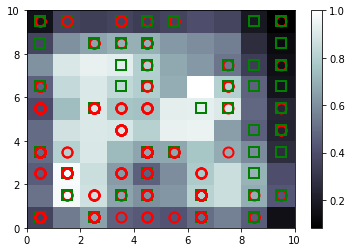

In [14]:
from pylab import bone , pcolor , colorbar, plot , show
#initializes the window containing the map
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r' , 'g']
for i,j in enumerate(x):
    winning_node = som.winner(j)
    plot(winning_node[0]+0.5,
         winning_node[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10 , 
         markeredgewidth = 2
        )
show()

In [15]:
mappings = som.win_map(x)

In [19]:
print(mappings.keys())

dict_keys([(3, 2), (0, 0), (2, 0), (4, 6), (8, 0), (9, 1), (6, 1), (4, 7), (7, 7), (8, 3), (5, 3), (6, 0), (9, 7), (4, 8), (0, 9), (0, 3), (8, 4), (8, 6), (1, 1), (5, 9), (9, 3), (3, 4), (0, 5), (3, 9), (9, 4), (4, 2), (1, 2), (4, 3), (6, 2), (4, 1), (4, 5), (7, 5), (8, 1), (2, 5), (9, 5), (8, 2), (4, 0), (2, 8), (3, 7), (9, 9), (9, 8), (7, 6), (1, 9), (9, 6), (3, 6), (1, 3), (8, 7), (4, 9), (3, 8), (3, 1), (0, 6), (3, 5), (6, 5), (2, 1), (0, 2), (5, 0), (8, 9), (7, 3), (3, 0), (0, 8), (6, 8)])


In [23]:
(8,1) in mappings
(6,8) in mappings

True

In [25]:
mappings[(3,8)]

[array([0.69973451, 1.        , 0.14406015, 0.41517857, 0.        ,
        0.61538462, 0.375     , 0.02929825, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.08      , 0.003     ]),
 array([0.60290155, 1.        , 0.30827068, 0.10714286, 0.5       ,
        0.92307692, 0.875     , 0.26017544, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ]),
 array([6.99850638e-01, 0.00000000e+00, 5.30075188e-01, 5.35714286e-02,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 5.00000000e-02, 2.70000000e-04]),
 array([0.81139155, 0.        , 0.41473684, 0.03571429, 0.5       ,
        0.15384615, 0.5       , 0.07894737, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.003     ]),
 array([0.73206556, 0.        , 0.36842105, 0.21428571, 0.5       ,
        0.23076923, 0.375     , 0.035087

In [22]:
print(mappings[(8,1)])
print()
print(mappings[(6,8)])

[array([0.85004144, 1.        , 0.42481203, 0.34964286, 0.5       ,
       1.        , 0.875     , 0.27929825, 1.        , 1.        ,
       0.11940299, 0.        , 0.5       , 0.        , 0.        ]), array([0.52695522, 1.        , 0.41233083, 0.14428571, 0.5       ,
       0.92307692, 0.875     , 0.24561404, 1.        , 1.        ,
       0.11940299, 0.        , 0.5       , 0.16      , 0.        ]), array([0.98109951, 1.        , 0.36721805, 0.36160714, 0.5       ,
       1.        , 0.375     , 0.0877193 , 1.        , 1.        ,
       0.08955224, 0.        , 0.5       , 0.26      , 0.00196   ]), array([0.42277429, 1.        , 0.61774436, 0.55357143, 0.5       ,
       0.69230769, 1.        , 0.        , 1.        , 1.        ,
       0.29850746, 0.        , 0.5       , 0.076     , 0.0013    ]), array([0.52909354, 1.        , 0.65669173, 0.30357143, 0.5       ,
       0.69230769, 0.875     , 0.24561404, 1.        , 1.        ,
       0.04477612, 0.        , 0.5       , 0.        

In [27]:
frauds = np.concatenate((mappings[(8,1)], mappings[(3,8)]), axis = 0)
frauds = scl.inverse_transform(frauds)

In [28]:
frauds

array([[1.5777994e+07, 1.0000000e+00, 4.2000000e+01, 9.7900000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 7.9600000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5697310e+07, 1.0000000e+00, 4.1170000e+01, 4.0400000e+00,
        2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 7.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 1.0000000e+00],
       [1.5810723e+07, 1.0000000e+00, 3.8170000e+01, 1.0125000e+01,
        2.0000000e+00, 1.4000000e+01, 4.0000000e+00, 2.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 5.2000000e+02, 1.9700000e+02],
       [1.5671293e+07, 1.0000000e+00, 5.4830000e+01, 1.5500000e+01,
        2.0000000e+00, 1.0000000e+01, 9.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+01, 0.0000000e+00,
        2.0000000e+00,